<a href="https://colab.research.google.com/github/wjunior83/statsmodels/blob/master/Lista_Python2_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
salario = pd.read_excel('/content/salario_python.xlsx')
salario.head()

,id,salbeg,time,age,edlevel
0,628,8400,81,28.50,16
1,630,24000,73,40.33,16
2,632,10200,83,31.08,15
3,633,8700,93,31.17,16
4,635,17400,83,41.92,19


In [ ]:
salario = salario[['salbeg','time','age','edlevel']]

In [ ]:
salario.describe()

,salbeg,time,age,edlevel
count,474.000000,474.000000,474.000000,474.000000
mean,6806.434599,81.109705,37.186139,13.491561
std,3148.255262,10.060945,11.787242,2.884846
min,3600.000000,63.000000,23.000000,8.000000
25%,4995.000000,72.000000,28.500000,12.000000
50%,6000.000000,81.000000,32.000000,12.000000
75%,6996.000000,90.000000,45.980000,15.000000
max,31992.000000,98.000000,64.500000,21.000000


In [ ]:
#variável "edlevel" tem correlação de moderada para forte, pois é a que mais se aproxima de 1
salario.corr()

,salbeg,time,age,edlevel
salbeg,1.000000,-0.019753,-0.011040,0.633196
time,-0.019753,1.000000,0.051630,0.047379
age,-0.011040,0.051630,1.000000,-0.280842
edlevel,0.633196,0.047379,-0.280842,1.000000


In [ ]:
# modelo utilizando a variável que possui melhor correlação
x = salario['edlevel']
x.head()

0    16
1    16
2    15
3    16
4    19
Name: edlevel, dtype: int64

In [ ]:
x = sm.add_constant(x)
x.head()

,const,edlevel
0,1.0,16
1,1.0,16
2,1.0,15
3,1.0,16
4,1.0,19


In [ ]:
y = salario['salbeg']
y.head()

0     8400
1    24000
2    10200
3     8700
4    17400
Name: salbeg, dtype: int64

In [ ]:
modelo = sm.OLS(y,x)

In [ ]:
ajuste = modelo.fit()

In [ ]:
ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salbeg   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     315.9
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.76e-54
Time:                        01:26:14   Log-Likelihood:                -4368.5
No. Observations:                 474   AIC:                             8741.
Df Residuals:                     472   BIC:                             8749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2516.3869    536.368     -4.692      0.000   -3570.351   -1462.423
edlevel      691.0113     38.879     17.773      0.000     614.614     767.408
==============================================================================
Omnibus:                      346.497   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6564.617
Skew:                           2.948   Prob(JB):                         0.00
Kurtosis:                      20.252   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
previsao = modelo.predict(ajuste.params)
previsao

array([ 8539.7942199 ,  8539.7942199 ,  7848.78289927,  8539.7942199 ,
       10612.8281818 ,  9921.81686117,  7848.78289927,  7848.78289927,
        7848.78289927,  5775.74893737,  7848.78289927,  5775.74893737,
        9230.80554053,  7848.78289927, 10612.8281818 ,  5775.74893737,
       10612.8281818 ,  7848.78289927,  7848.78289927,  9230.80554053,
        7848.78289927,  8539.7942199 , 11303.83950243,  8539.7942199 ,
       10612.8281818 , 10612.8281818 ,  9230.80554053,  5775.74893737,
        9921.81686117,  7848.78289927,  7848.78289927,  9921.81686117,
        9230.80554053,  5775.74893737, 10612.8281818 ,  5775.74893737,
       10612.8281818 ,  7848.78289927,  3011.70365483,  5775.74893737,
        7848.78289927,  7848.78289927,  7848.78289927,  8539.7942199 ,
        8539.7942199 ,  8539.7942199 ,  3011.70365483,  7848.78289927,
        5775.74893737,  8539.7942199 ,  7848.78289927,  8539.7942199 ,
        7848.78289927,  7848.78289927,  9921.81686117, 10612.8281818 ,
      

In [ ]:
salario['previsao'] = previsao
salario.head()

,salbeg,time,age,edlevel,previsao
0,8400,81,28.50,16,8539.794220
1,24000,73,40.33,16,8539.794220
2,10200,83,31.08,15,7848.782899
3,8700,93,31.17,16,8539.794220
4,17400,83,41.92,19,10612.828182


In [ ]:
salario['erro'] = salario.salbeg - salario.previsao
salario.head()

,salbeg,time,age,edlevel,previsao,erro
0,8400,81,28.50,16,8539.794220,-139.794220
1,24000,73,40.33,16,8539.794220,15460.205780
2,10200,83,31.08,15,7848.782899,2351.217101
3,8700,93,31.17,16,8539.794220,160.205780
4,17400,83,41.92,19,10612.828182,6787.171818


In [ ]:
salario.describe()

,salbeg,time,age,edlevel,previsao,erro
count,474.000000,474.000000,474.000000,474.000000,474.000000,4.740000e+02
mean,6806.434599,81.109705,37.186139,13.491561,6806.434599,1.688513e-13
std,3148.255262,10.060945,11.787242,2.884846,1993.461525,2.436724e+03
min,3600.000000,63.000000,23.000000,8.000000,3011.703655,-4.248783e+03
25%,4995.000000,72.000000,28.500000,12.000000,5775.748937,-1.422041e+03
50%,6000.000000,81.000000,32.000000,12.000000,5775.748937,-5.577716e+02
75%,6996.000000,90.000000,45.980000,15.000000,7848.782899,8.684416e+02
max,31992.000000,98.000000,64.500000,21.000000,11994.850823,2.137917e+04


{'boxes': [<matplotlib.lines.Line2D at 0x7fa8e7c65128>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8e7c65b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8e7c705f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8e7c70278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8e7c65438>,
  <matplotlib.lines.Line2D at 0x7fa8e7c657b8>]}

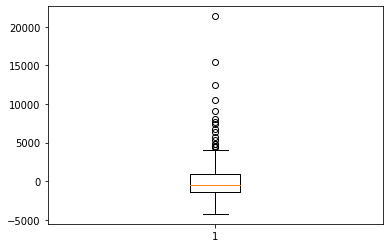

In [ ]:
plt.boxplot(salario.erro)